In [2]:
import sys
sys.path.insert(0, r'../../../quetzal')

from syspy.clients.linedraft_client import linedraft_client
from quetzal.model import stepmodel

% matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 9]
import geopandas as gpd

In [3]:
training_folder = '../../'
input_folder = training_folder + 'inputs/'

In [4]:
client = linedraft_client.LinedraftClient(api_root='http://swsdev.systra.info/demo/transim/api/')

In [5]:
links, nodes, zones = client.links_nodes_zones(project_name='idf', scenario_name='idf')

In [6]:
sm = stepmodel.StepModel()
sm.zones = zones

Model epsg not defined: setting epsg to default one: 4326
Model coordinates_unit not defined: setting coordinates_unit to default one: degree


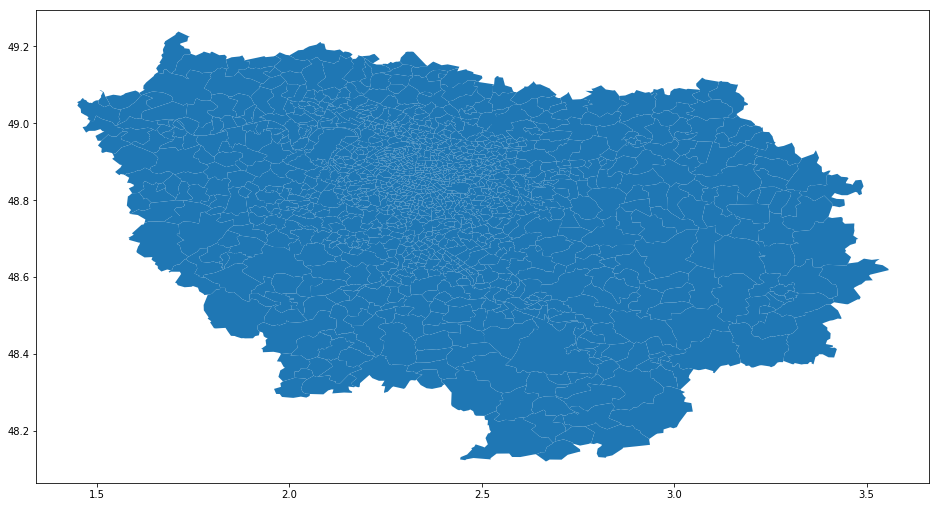

In [7]:
gpd.GeoDataFrame(sm.zones).plot()

In [8]:
sm.to_json(input_folder + 'zones', only_attributes=['zones'])

to_hdf(overwriting): 100%|█████████████████████████████████████████████████████████████| 26/26 [00:01<00:00, 16.65it/s]


In [10]:
pro = sm.change_epsg(2154, 'meter')

Reprojecting model from epsg 4326 to epsg 2154: 100%|█████████████████████████████████| 26/26 [00:00<00:00, 136.82it/s]


In [11]:
pro.preparation_clusterize_zones()

AttributeError: 'StepModel' object has no attribute 'volumes'

In [12]:
help(pro.preparation_clusterize_zones)

Help on method preparation_clusterize_zones in module quetzal.model.preparationmodel:

preparation_clusterize_zones(max_zones=500, cluster_column=None, is_od_stack=False) method of quetzal.model.stepmodel.StepModel instance
    clusterize zones
        * requires: zones, volumes
        * builds: zones, volumes, (cluster_series)



In [13]:
from syspy.spatial import spatial

In [15]:
a, b = spatial.zone_clusters(pro.zones.buffer(1))

AttributeError: 'DataFrame' object has no attribute 'buffer'